# PROYECTO FINAL PARTE 3- 2024

* Instituto Superior Politécnico Córdoba.
* Grupo nº 2.
* Álvarez, Agustin.   
* Boero, Aldana.   
* Octtinger, Martina. 
* Vila, Mariano.


## Reconocimiento de emociones a partir de imágenes faciales

## INFORMACIÓN DEL DATASET

El dataset FER-2013 (Facial Expression Recognition 2013) es un conjunto de datos utilizado ampliamente en la investigación sobre el reconocimiento de emociones a partir de imágenes faciales.

Origen:

El dataset FER-2013 fue introducido en la competencia "Challenges in Representation Learning: Facial Expression Recognition Challenge" durante la conferencia International Conference on Machine Learning (ICML) en 2013.
Las imágenes fueron recolectadas de una búsqueda en Google Image Search y etiquetadas automáticamente usando el API de la plataforma de crowdsourcing Amazon Mechanical Turk.  
Cantidad de Imágenes:

Cuenta con un total de 35,887 imágenes en escala de grises.
Las imágenes están divididas en tres subconjuntos:
Entrenamiento (Training): 28,709 imágenes.
Validación (PublicTest): 3,589 imágenes.
Prueba (PrivateTest): 3,589 imágenes.  
Resolución:

Todas las imágenes en el dataset tienen una resolución de 48x48 píxeles.  
Etiquetas de Emociones:

Las imágenes están etiquetadas con una de las siguientes siete categorías de emociones:
0: Enfado (Angry)
1: Disgusto (Disgust)
2: Miedo (Fear)
3: Felicidad (Happy)
4: Tristeza (Sad)
5: Sorpresa (Surprise)
6: Neutral (Neutral)

## IMPORTAR LIBRERIAS

In [1]:
# Importar librerías necesarias
import numpy as np  # Manipulación de arrays
import pandas as pd  # Manipulación de datos
import matplotlib.pyplot as plt  # Crear gráficos
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import math
import cv2  # Procesamiento de imágenes
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
import keras
from tensorflow.keras.applications import VGG19
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D,GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras.utils import layer_utils, np_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from keras import losses
from tensorflow.python.keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# https://www.kaggle.com/datasets/deadskull7/fer2013

# 1) COMPRENSION DEL NEGOCIO

Paso 1: Comprensión del Negocio.  
* Análizar la situación, problemática a trabajar, así como los recursos y limitaciones. 
* Diseñar un plan de trabajo interno, para organizar el proyecto en cada una de sus etapas y un gantt general.   
* Metodología: CRISP-DM (Cross Industry Standard Process for Data Mining), la cual nos provee de un marco estructurado para el desarrollo de proyectos de minería de datos, brindando descripciones de las fases del mismo, las tareas necesarias en cada etapa y las relaciones entre estas. 
* Objetivo: desarrollar un sistema que pueda reconocer y clasificar las emociones humanas a través de imágenes, utilizando técnicas de deep learning. 
* Posibles impactos empresariales de la solución:  *Análisis del Comportamiento del Consumidor: Entender las emociones de los clientes frente a diferentes productos y servicios ayuda a afinar la oferta comercial. * Análisis de Sentimientos en Tiempo Real: Evaluar las reacciones emocionales de los consumidores a anuncios y productos permite ajustar estrategias de marketing rápidamente para maximizar el impacto positivo.
* Modelo a implementar: Redes Neuronales Convolucionales (CNN). Librería Tensorflow y Keras. 

# 2) COMPRENSIÓN DE LOS DATOS

Resumen detectado en la exploración:
* El dataset cuenta con 35887 entradas.
* Todas las imágenes tienen una resolución de 48x48 píxeles.
* No se observan campos nulos en el dataset.
* El tipo de emociones son 7. El valor de cada categoría va en el rango de 0 a 6.
* Se aprecia en los datos, que la categoría 1 (disgusto) tiene baja cantidad de muestras en relación al resto.
* Las categorías en el dataset FER-2013 generalmente se etiquetan con los siguientes números y sus respectivas emociones:
* 0 - Enojo (Angry).  
* 1 - Disgusto (Disgust).  
* 2 - (Fear).  
* 3 - Felicidad (Happy).           
* 4 - Tristeza (Sad).
* 5 - Sorpresa (Surprise).
* 6 - Neutral.

In [2]:
df=pd.read_csv('fer2013.csv')
print(df.head())
print()
print(df.groupby('emotion').count())
print()
print(df.groupby('Usage').count())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

         pixels  Usage
emotion               
0          4953   4953
1           547    547
2          5121   5121
3          8989   8989
4          6077   6077
5          4002   4002
6          6198   6198

             emotion  pixels
Usage                       
PrivateTest     3589    3589
PublicTest      3589    3589
Training       28709   28709


In [3]:
print(df.info())
print()
print(df.describe())
print()
print("Valores únicos de campo emotion: ",df['emotion'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None

            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000

Valores únicos de campo emotion:  [0 2 4 6 3 5 1]


In [4]:
#CONTROL DE NULOS
print(df.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


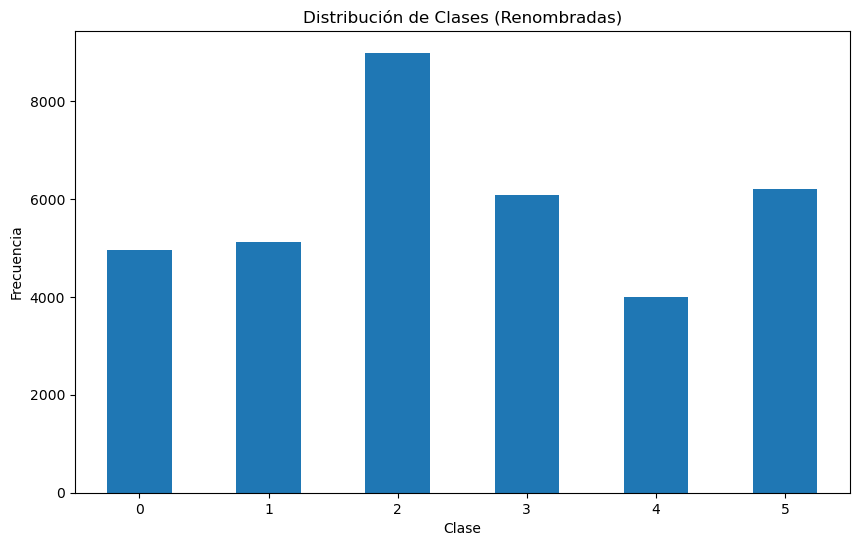

In [5]:
# Eliminar filas que contienen la clase 1
df = df[df['emotion'] != 1]

# Renombrar las clases
df['emotion'] = df['emotion'].map(lambda x: x - 1 if x > 1 else x)

# Contar las clases restantes
class_counts = df['emotion'].value_counts().sort_index()

# Graficar las clases restantes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribución de Clases (Renombradas)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

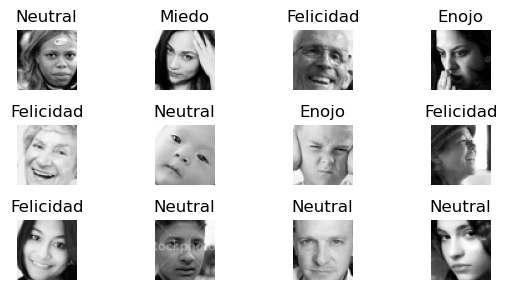

In [6]:
# Mapear las etiquetas numéricas a las emociones
emotion_labels = {
    0: 'Enojo',
    1: 'Miedo',
    2: 'Felicidad',
    3: 'Tristeza',
    4: 'Sorpresa',
    5: 'Neutral'
    
}

# Seleccionar 12 muestras aleatorias
sample_df = df.sample(n=12, random_state=1)  # Puedes cambiar el random_state para obtener diferentes muestras

# Configurar la figura
fig, axes = plt.subplots(3, 4, figsize=(6,3))
axes = axes.flatten()

for i, (index, row) in enumerate(sample_df.iterrows()):
    # Convertir los píxeles de string a una matriz de 48x48
    pixels = np.array(row['pixels'].split(), dtype='float32')
    pixels = pixels.reshape(48, 48)

    # Obtener la etiqueta de la emoción
    emotion = emotion_labels[row['emotion']]

    # Mostrar la imagen
    axes[i].imshow(pixels, cmap='gray')
    axes[i].set_title(emotion)
    axes[i].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

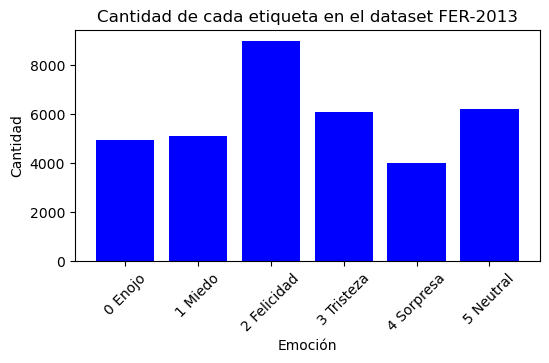

In [7]:
# Crear una nueva columna con las etiquetas de emociones
df['emotion_label'] = df['emotion'].map(emotion_labels)

# Verificar si la columna 'emotion_label' se creó correctamente
if df['emotion_label'].isnull().any():
    raise ValueError("Algunas etiquetas no se mapearon correctamente a emociones")

# Contar la cantidad de cada etiqueta y ordenar por la categoría numérica
emotion_counts = df['emotion'].value_counts().sort_index().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Crear las etiquetas del eje x con el formato "0 Enojo", "1 Disgusto", etc.
emotion_counts['Emotion_Label'] = emotion_counts['Emotion'].map(lambda x: f"{x} {emotion_labels[x]}")

# Crear el gráfico de barras usando matplotlib
plt.figure(figsize=(6,3))
plt.bar(emotion_counts['Emotion_Label'], emotion_counts['Count'],color='blue')

# Añadir título y etiquetas
plt.title('Cantidad de cada etiqueta en el dataset FER-2013')
plt.xlabel('Emoción')
plt.ylabel('Cantidad')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# 3) PREPROCESAMIENTO DE LOS DATOS

In [8]:
from imblearn.over_sampling import RandomOverSampler
# Procesar las imágenes
pixel_list = df['pixels'].to_list()

Arr = []
for pix in pixel_list:
    img = [int(pixel) for pixel in pix.split(' ')]
    img = np.asarray(img).reshape(48, 48)
    Arr.append(img.astype('float32') / 255.0)

# Se itera sobre la lista de píxeles de cada imagen y se convierte en un array de píxeles. Luego, se reformatea el array de píxeles en una matriz 2D de 48x48
# para representar la imagen. Además, se normalizan los valores de los píxeles dividiéndolos por 255.0 para escalarlos al rango [0, 1]

X = np.array(Arr)
X = np.expand_dims(X, -1)

y = df['emotion'].values

print(X.shape)
print(y.shape)

# Dividir en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)

# Aplanar los datos para aplicar RandomOverSampler
n_samples, height, width, depth = x_train.shape
x_train_flat = x_train.reshape((n_samples, height * width * depth))

# Aplicar RandomOverSampler para sobremuestreo
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_flat, y_train)

# Volver a la forma original
x_train_resampled = x_train_resampled.reshape((x_train_resampled.shape[0], height, width, depth))

print(x_train_resampled.shape)
print(y_train_resampled.shape)

# Dividir el conjunto de entrenamiento resampleado en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train_resampled, y_train_resampled, test_size=0.1, random_state=42)

# Convertir las etiquetas a categóricas
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)




(35340, 48, 48, 1)
(35340,)
(28272, 48, 48, 1)
(28272,)
(42918, 48, 48, 1)
(42918,)
(38626, 48, 48, 1)
(4292, 48, 48, 1)
(38626, 6)
(4292, 6)


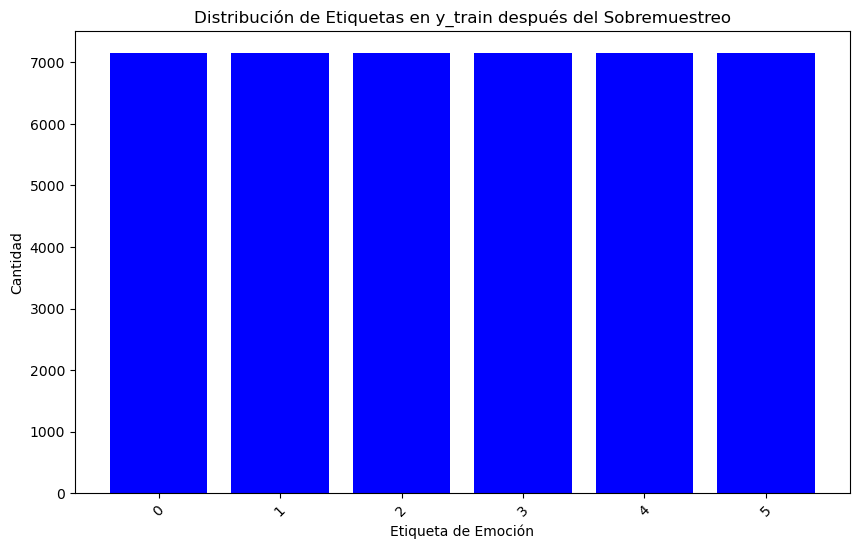

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Contar la cantidad de etiquetas en y_train
unique, counts = np.unique(y_train_resampled, return_counts=True)
label_counts = dict(zip(unique, counts))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='blue')
plt.xlabel('Etiqueta de Emoción')
plt.ylabel('Cantidad')
plt.title('Distribución de Etiquetas en y_train después del Sobremuestreo')
plt.xticks(list(label_counts.keys()), rotation=45)
plt.show()


# 4) MODELADO

In [10]:

# Definir el modelo CNN (modelo5)
modelo5 = Sequential(name="CNN_model5")

# Capas convolucionales y de pooling
modelo5.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
modelo5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo5.add(MaxPooling2D((2, 2)))
modelo5.add(Dropout(0.25))

modelo5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo5.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelo5.add(MaxPooling2D((2, 2)))
modelo5.add(Dropout(0.25))

# Capa convolucional adicional (se agregaron 2 capas convolucionales adicionales)
modelo5.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modelo5.add(MaxPooling2D((2, 2)))
modelo5.add(Dropout(0.25))

modelo5.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Nueva capa convolucional
modelo5.add(MaxPooling2D((2, 2)))  # Nueva capa de pooling
modelo5.add(Dropout(0.25))  # Nueva capa de dropout

# Capas Flatten y Dense
modelo5.add(Flatten())
modelo5.add(Dense(512, activation='relu'))
modelo5.add(BatchNormalization())
modelo5.add(Dropout(0.5))

modelo5.add(Dense(256, activation='relu'))
modelo5.add(BatchNormalization())
modelo5.add(Dropout(0.5))

# Capa de salida
modelo5.add(Dense(6, activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
modelo5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Resumen del modelo
modelo5.summary()


Model: "CNN_model5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0

## ENTRENAR MODELO 5

In [11]:
batch_size=128

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              
                              patience=3,
                              verbose=1,
                              min_lr=0.00001)


# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

callbacks = [early_stopping, reduce_lr]
# Entrenar el modelo con data augmentation
history5 = modelo5.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/40
302/302 [==============================] - 42s 116ms/step - loss: 2.1745 - accuracy: 0.1860 - val_loss: 1.7628 - val_accuracy: 0.2274
Epoch 2/40
302/302 [==============================] - 32s 105ms/step - loss: 1.8331 - accuracy: 0.2088 - val_loss: 1.7892 - val_accuracy: 0.1964
Epoch 3/40
302/302 [==============================] - 32s 105ms/step - loss: 1.7113 - accuracy: 0.2726 - val_loss: 1.7856 - val_accuracy: 0.2661
Epoch 4/40
302/302 [==============================] - 32s 105ms/step - loss: 1.5892 - accuracy: 0.3458 - val_loss: 1.6090 - val_accuracy: 0.3481
Epoch 5/40
302/302 [==============================] - 32s 105ms/step - loss: 1.4472 - accuracy: 0.4184 - val_loss: 1.3405 - val_accuracy: 0.4588
Epoch 6/40
302/302 [==============================] - 32s 105ms/step - loss: 1.3371 - accuracy: 0.4680 - val_loss: 1.2421 - val_accuracy: 0.5063
Epoch 7/40
302/302 [==============================] - 32s 105ms/step - loss: 1.2741 - accuracy: 0.4960 - val_loss: 1.2515 - val_ac

# 5) EVALUACIÓN

135/135 [==============================] - 1s 10ms/step - loss: 0.8062 - accuracy: 0.7027
Precisión en el conjunto de validación del modelo3: 0.70



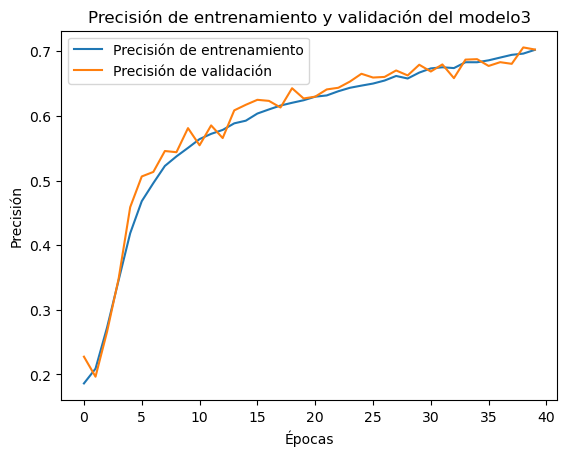

In [12]:
# Evaluación del modelo en el conjunto de validación
val_loss, model5_accuracy = modelo5.evaluate(x_val, y_val)
print(f"Precisión en el conjunto de validación del modelo3: {model5_accuracy:.2f}")
print()

# Guardar la precisión en una variable
model5_accuracy_variable = model5_accuracy

# Gráfico de resultados
plt.plot(history5.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history5.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación del modelo3')
plt.show()

Ejemplos de imágenes clasificadas correctamente:


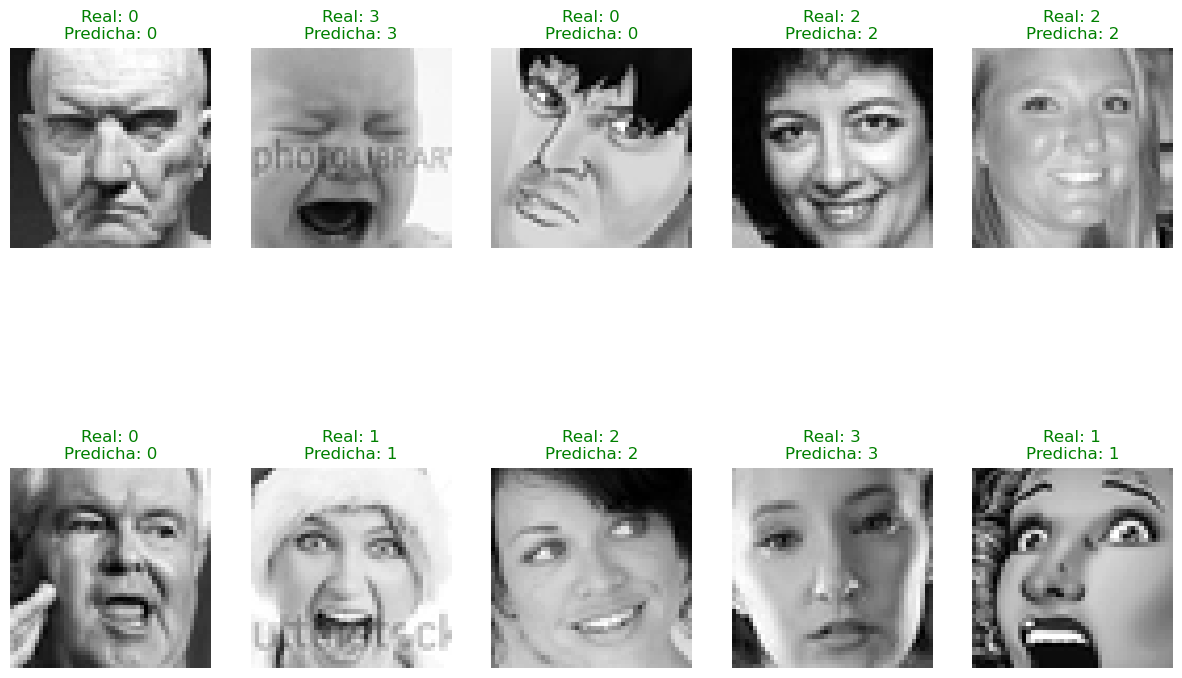

Ejemplos de imágenes clasificadas incorrectamente:


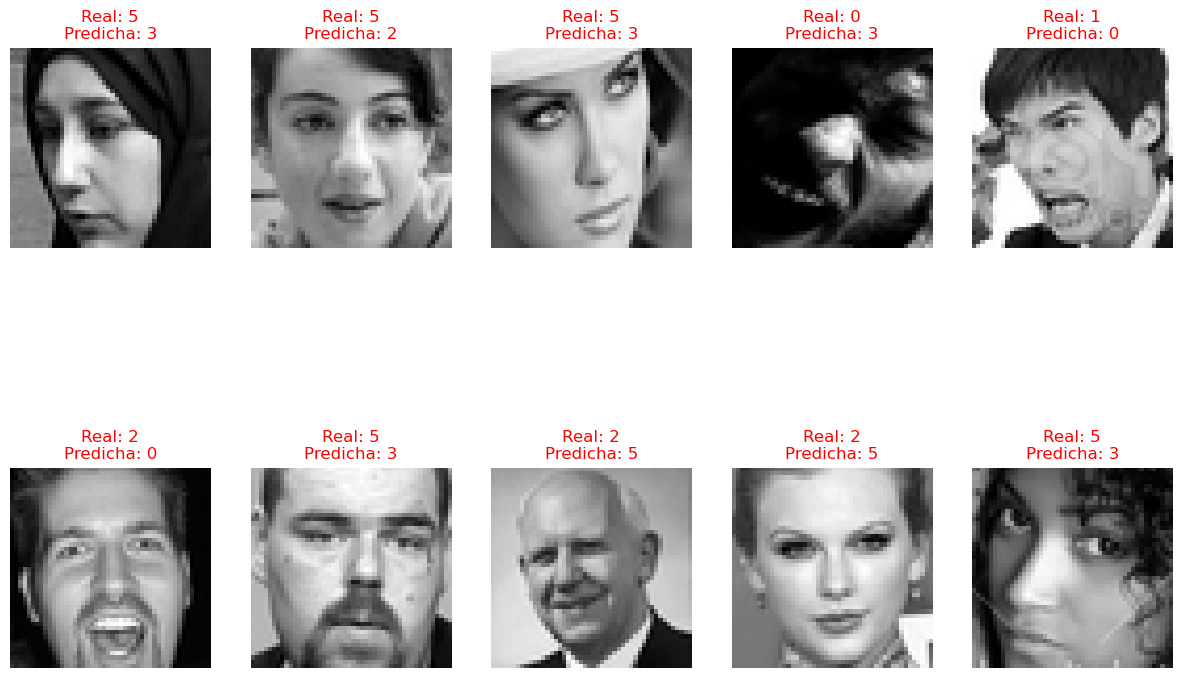

In [14]:
import matplotlib.pyplot as plt

# Función para imprimir ejemplos de imágenes
def plot_predicted_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 10))
    for i in range(10):  # Cambia 10 por el número de ejemplos que deseas mostrar
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(48, 48), cmap='gray')
        plt.axis('off')
        if true_labels[i] == predicted_labels[i]:
            plt.title(f"Real: {true_labels[i]}\nPredicha: {predicted_labels[i]}", color='green')
        else:
            plt.title(f"Real: {true_labels[i]}\nPredicha: {predicted_labels[i]}", color='red')
    plt.show()

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = modelo5.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Filtrar índices de predicciones correctas e incorrectas
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Imprimir ejemplos de imágenes clasificadas correctamente (en verde) y clasificadas incorrectamente (en rojo)
print("Ejemplos de imágenes clasificadas correctamente:")
plot_predicted_images(x_test[correct_indices], true_labels[correct_indices], predicted_labels[correct_indices])

print("Ejemplos de imágenes clasificadas incorrectamente:")
plot_predicted_images(x_test[incorrect_indices], true_labels[incorrect_indices], predicted_labels[incorrect_indices])


* Podemos ingresar una url para que el modelo clasifique la emoción

Ingrese la URL de la imagen:  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1LA4vfyi9LQuLqnHna-GKp3q9UNN629dtMg&s


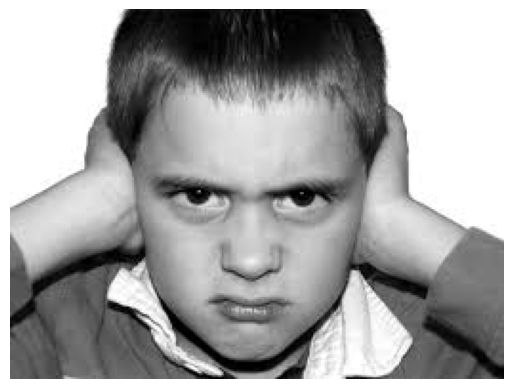

Predicción: Enojo


In [23]:
import requests
from PIL import Image
from io import BytesIO
import urllib.request

emotion_labels = {
    0: 'Enojo',
    1: 'Miedo',
    2: 'Felicidad',
    3: 'Tristeza',
    4: 'Sorpresa',
    5: 'Neutral'
    
}

# Solicitar la URL de la imagen al usuario
url = input("Ingrese la URL de la imagen: ")

# Leer la imagen desde la URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)  # Leer como escala de grises

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# El modelo espera imágenes de 48x48 píxeles
image_resized = cv2.resize(image, (48, 48))

# Agregar una dimensión para el canal
image_resized = np.expand_dims(image_resized, axis=-1)

# Agregar una dimensión para el lote
image_resized = np.expand_dims(image_resized, axis=0)

# Realizar la predicción sobre la imagen
prediction = modelo5.predict(image_resized)
predicted_class = np.argmax(prediction)

# Mostrar la emoción predicha
print('Predicción:', emotion_labels[predicted_class])

Ingrese la URL de la imagen:  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnBMerKanoJbev6IJUYHQsf4dZiadXK9nmqA&s


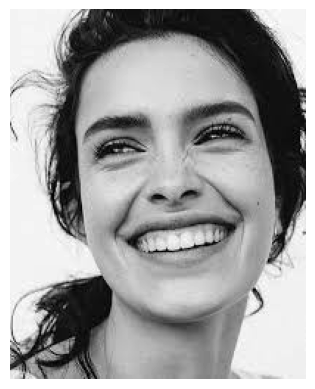

Predicción: Felicidad


In [25]:
import requests
from PIL import Image
from io import BytesIO
import urllib.request

emotion_labels = {
    0: 'Enojo',
    1: 'Miedo',
    2: 'Felicidad',
    3: 'Tristeza',
    4: 'Sorpresa',
    5: 'Neutral'
    
}

# Solicitar la URL de la imagen al usuario
url = input("Ingrese la URL de la imagen: ")

# Leer la imagen desde la URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)  # Leer como escala de grises

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# El modelo espera imágenes de 48x48 píxeles
image_resized = cv2.resize(image, (48, 48))

# Agregar una dimensión para el canal
image_resized = np.expand_dims(image_resized, axis=-1)

# Agregar una dimensión para el lote
image_resized = np.expand_dims(image_resized, axis=0)

# Realizar la predicción sobre la imagen
prediction = modelo5.predict(image_resized)
predicted_class = np.argmax(prediction)

# Mostrar la emoción predicha
print('Predicción:', emotion_labels[predicted_class])

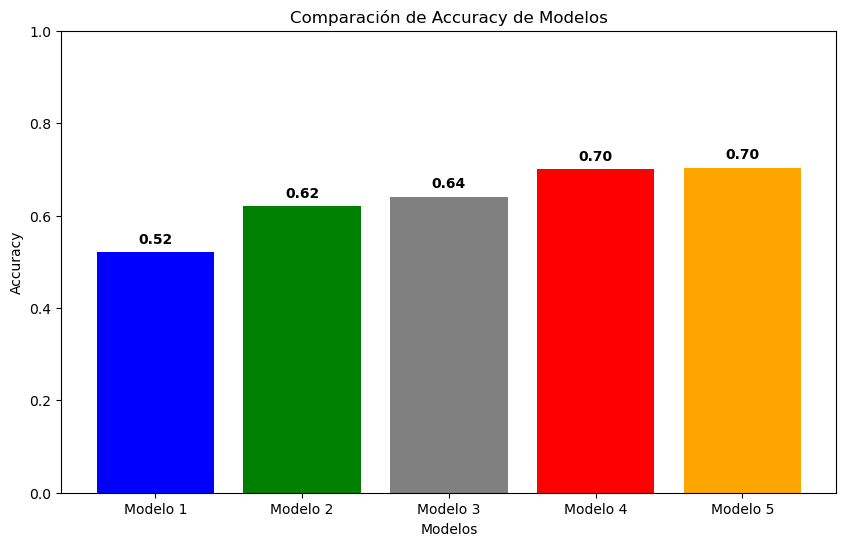

In [13]:
accuracy_modelo1=.52
accuracy_modelo2=.62
accuracy_modelo3=.64
accuracy_densenet=.70
accuracy_modelo5=model5_accuracy_variable

# Nombres de los modelos
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3','Modelo Densenet','Modelo 5']
accuracies = [accuracy_modelo1, accuracy_modelo2, accuracy_modelo3,accuracy_densenet,accuracy_modelo5]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'grey','red','orange'])

# Añadir títulos y etiquetas
plt.title('Comparación de Accuracy de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Asegura que el eje y va de 0 a 1

# Añadir valores de accuracy encima de las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# Mostrar el gráfico
plt.show()

# CONCLUSIONES PARTE 3

* En el modelo 5 se utilizó RandomOverSampler para sobremuestrear las clases minoritarias en el conjunto de entrenamiento.
Los datos se aplanan antes de aplicar el sobremuestreo y luego se vuelven a formar. Al sobremuestrear las clases minoritarias, se equilibra la distribución de clases en el conjunto de datos, lo que ayuda al modelo a aprender de manera más equitativa de todas las clases.
* Además se eliminó la categoría Disgust, dado que son muy pocas muestras.
* También se empleó ReduceLROnPlateau como una técnica de ajuste de la tasa de aprendizaje durante el entrenamiento. Esta técnica reduce la tasa de aprendizaje cuando el rendimiento en el conjunto de validación no mejora durante un número determinado de épocas. Esto permite que el modelo se ajuste de manera más fina a los datos, evitando el sobreajuste y mejorando la convergencia.
* Se alcanzó mejor precisión que los 3 modelos iniciales e igualó al modelo4 Densenet.
* Además este modelo al probarlo con imágenes de internet en forma aleatoria, evidencia mejores resultados.
* En los gráficos de entrenamiento se aprecia menor tendencia al overfitting en este modelo 5 vs Densenet.